In [8]:
import pandas as pd
bits = pd.read_csv("./TR_DMS1-clusters.csv")

In [9]:
bits = bits[["structure","cluster_name","cluster_colour"]]
bits

,structure,cluster_name,cluster_colour
0,bit_1,2,orange
1,bit_2,3,pink
2,bit_3,2,orange
3,bit_4,2,orange
4,bit_5,2,orange
...,...,...,...
10293,bit_10294,4,blue
10294,bit_10295,1,green
10295,bit_10296,2,orange
10296,bit_10297,4,blue


In [10]:
def parse_file(filename):
    f = open(filename)
    structure = f.read()
    f.close()
    return structure.split("\n")[1][60:71]


#f = open("../bit_merged/folded/bit_1.fold")
#structure = f.read()
#print(structure.split("\n")[1][60:71])
#print(structure.split("\n")[3][60:71])

In [11]:
templates = []
for b in bits["structure"]:
    file = "../bit_merged/folded/" + b + ".txt001.element_string"
    template = parse_file(file)
    template = [*template]
    templates.append({"A1":template[0],
                                 "A2":template[1],
                                 "C1":template[2],
                                 "C2":template[3],
                                 "C3":template[4],
                                 "U":template[5],
                                 "A3":template[6],
                                 "A4":template[7],
                                 "A5":template[8],
                                 "C4":template[9],
                                 "C5":template[10]
                                })

    

In [12]:
df=pd.DataFrame(templates)
df

,A1,A2,C1,C2,C3,U,A3,A4,A5,C4,C5
0,i,s,s,s,s,i,i,i,i,i,i
1,i,s,s,s,s,i,i,i,i,i,i
2,i,s,s,s,s,i,i,i,i,i,i
3,h,h,h,h,h,h,h,h,h,h,h
4,m,m,m,m,m,m,m,m,m,m,m
...,...,...,...,...,...,...,...,...,...,...,...
10293,m,m,m,m,m,m,m,m,m,m,m
10294,m,m,m,m,m,m,m,m,m,m,s
10295,i,s,s,s,s,m,m,m,m,m,m
10296,m,m,m,m,m,m,m,m,m,m,m


In [13]:
b = pd.concat([bits,df],axis=1)
b

,structure,cluster_name,cluster_colour,A1,A2,C1,C2,C3,U,A3,A4,A5,C4,C5
0,bit_1,2,orange,i,s,s,s,s,i,i,i,i,i,i
1,bit_2,3,pink,i,s,s,s,s,i,i,i,i,i,i
2,bit_3,2,orange,i,s,s,s,s,i,i,i,i,i,i
3,bit_4,2,orange,h,h,h,h,h,h,h,h,h,h,h
4,bit_5,2,orange,m,m,m,m,m,m,m,m,m,m,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10293,bit_10294,4,blue,m,m,m,m,m,m,m,m,m,m,m
10294,bit_10295,1,green,m,m,m,m,m,m,m,m,m,m,s
10295,bit_10296,2,orange,i,s,s,s,s,m,m,m,m,m,m
10296,bit_10297,4,blue,m,m,m,m,m,m,m,m,m,m,m


In [14]:
closed = pd.Series([(b.A1 == "s") | (b.A2 == "s")| (b.C1 == "s") | 
  (b.C2 == "s") | (b.C3 == "s") | (b.U == "s") |
  (b.A3 == "s") | (b.A4 == "s") | (b.A5== "s") | 
  (b.C4 == "s") | (b.C5 == "s")])
b["template"] = closed

In [15]:
b["template"].mask((b.A1 == "s") | (b.A2 == "s")| (b.C1 == "s") | 
  (b.C2 == "s") | (b.C3 == "s") | (b.U == "s") |
  (b.A3 == "s") | (b.A4 == "s") | (b.A5== "s") | 
  (b.C4 == "s") | (b.C5 == "s"),"closed",inplace=True)

In [16]:
b["template"].mask(b["template"]!="closed","open",inplace=True)
b

,structure,cluster_name,cluster_colour,A1,A2,C1,C2,C3,U,A3,A4,A5,C4,C5,template
0,bit_1,2,orange,i,s,s,s,s,i,i,i,i,i,i,closed
1,bit_2,3,pink,i,s,s,s,s,i,i,i,i,i,i,closed
2,bit_3,2,orange,i,s,s,s,s,i,i,i,i,i,i,closed
3,bit_4,2,orange,h,h,h,h,h,h,h,h,h,h,h,open
4,bit_5,2,orange,m,m,m,m,m,m,m,m,m,m,m,open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10293,bit_10294,4,blue,m,m,m,m,m,m,m,m,m,m,m,open
10294,bit_10295,1,green,m,m,m,m,m,m,m,m,m,m,s,closed
10295,bit_10296,2,orange,i,s,s,s,s,m,m,m,m,m,m,closed
10296,bit_10297,4,blue,m,m,m,m,m,m,m,m,m,m,m,open


In [17]:
bits_cl1 = b[b["cluster_name"] == 1]
bits_cl2 = b[b["cluster_name"] == 2]
bits_cl3 = b[b["cluster_name"] == 3]
bits_cl4 = b[b["cluster_name"] == 4]

In [18]:
columns_to_get_value_counts_for = ['A1', 'A2', 'C1', 'C2', 'C3', 'U', 'A3', 'A4', 'A5', 'C4','C5']


In [19]:
cl1_df = bits_cl1[columns_to_get_value_counts_for].apply(pd.Series.value_counts)

In [20]:
cl1_df

,A1,A2,C1,C2,C3,U,A3,A4,A5,C4,C5
h,1,1,NaN,NaN,92,92,92,92.0,92,92,92
i,228,50,23.0,22.0,23,87,94,106.0,90,50,47
m,2295,2213,2061.0,1983.0,2002,2288,2371,2377.0,2372,2358,210
s,51,311,491.0,570.0,458,108,18,NaN,21,75,2226


In [21]:
cl2_df = bits_cl2[columns_to_get_value_counts_for].apply(pd.Series.value_counts)
cl2_df

,A1,A2,C1,C2,C3,U,A3,A4,A5,C4,C5
h,26,17,5,5,39,39,39,39.0,38,37,37
i,621,127,77,76,77,163,186,298.0,179,157,139
m,2493,2422,2328,2323,2379,2904,2919,2923.0,2908,2804,2293
s,120,694,850,856,765,154,116,NaN,135,262,791


In [22]:
cl3_df = bits_cl3[columns_to_get_value_counts_for].apply(pd.Series.value_counts)
cl3_df

,A1,A2,C1,C2,C3,U,A3,A4,A5,C4,C5
h,11,4,NaN,NaN,71,71,71,71.0,71,71,71
i,416,199,91.0,91.0,109,184,202,296.0,201,197,158
m,1227,1202,1125.0,1125.0,1152,1413,1414,1414.0,1413,1400,795
s,127,376,565.0,565.0,449,113,94,NaN,96,113,757


In [23]:
cl4_df = bits_cl4[columns_to_get_value_counts_for].apply(pd.Series.value_counts)
cl4_df

,A1,A2,C1,C2,C3,U,A3,A4,A5,C4,C5
h,17,10,NaN,NaN,11,12,12,12.0,12,12,12
i,627,110,68.0,65.0,69,106,131,260.0,114,105,85
m,1899,1889,1874.0,1872.0,1881,2407,2410,2410.0,2410,2408,2158
s,139,673,740.0,745.0,721,157,129,NaN,146,157,427


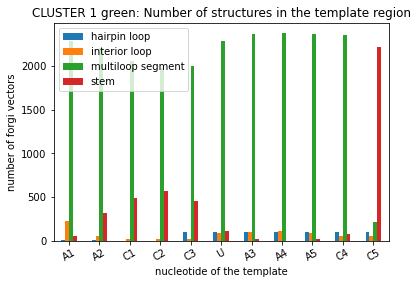

In [24]:
from matplotlib import pyplot as plt
cl1_df.transpose().plot(kind='bar')#,stacked=True)
plt.title("CLUSTER 1 green: Number of structures in the template region")
plt.xlabel("nucleotide of the template")
plt.xticks(rotation=30, horizontalalignment="center")
plt.ylabel("number of forgi vectors")
plt.legend(["hairpin loop","interior loop","multiloop segment","stem"])

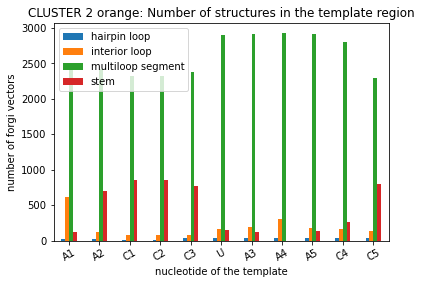

In [25]:
from matplotlib import pyplot as plt
cl2_df.transpose().plot(kind='bar')#,stacked=True)
plt.title("CLUSTER 2 orange: Number of structures in the template region")
plt.xlabel("nucleotide of the template")
plt.xticks(rotation=30, horizontalalignment="center")
plt.ylabel("number of forgi vectors")
plt.legend(["hairpin loop","interior loop","multiloop segment","stem"])

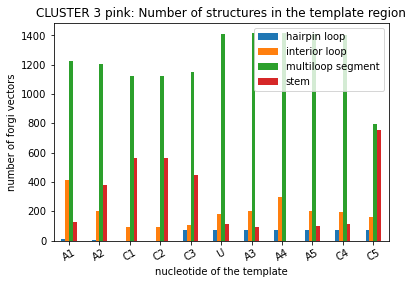

In [26]:
from matplotlib import pyplot as plt
cl3_df.transpose().plot(kind='bar')#,stacked=True)
plt.title("CLUSTER 3 pink: Number of structures in the template region")
plt.xlabel("nucleotide of the template")
plt.xticks(rotation=30, horizontalalignment="center")
plt.ylabel("number of forgi vectors")
plt.legend(["hairpin loop","interior loop","multiloop segment","stem"])

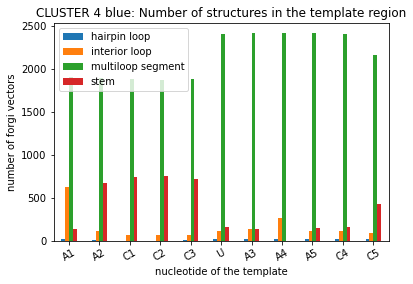

In [27]:
from matplotlib import pyplot as plt
cl4_df.transpose().plot(kind='bar')#,stacked=True)
plt.title("CLUSTER 4 blue: Number of structures in the template region")
plt.xlabel("nucleotide of the template")
plt.xticks(rotation=30, horizontalalignment="center")
plt.ylabel("number of forgi vectors")
plt.legend(["hairpin loop","interior loop","multiloop segment","stem"])

Text(0, 0.5, 'number of forgi vectors')

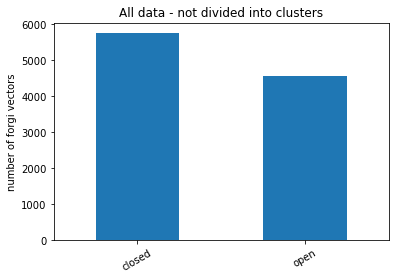

In [30]:
b["template"].value_counts().plot(kind='bar')#,stacked=True)
plt.title("All data - not divided into clusters")
#plt.xlabel("open / closed (at least one nucleotide in stem structure)")
plt.xticks(rotation=30, horizontalalignment="center")
plt.ylabel("number of forgi vectors")


In [32]:
df = b.groupby("cluster_name")["template"].value_counts().reset_index(name="count")
df

,cluster_name,template,count
0,1,closed,2400
1,1,open,175
2,2,open,1932
3,2,closed,1328
4,3,closed,1065
5,3,open,716
6,4,open,1725
7,4,closed,957


In [33]:
df1 = pd.pivot_table(df,  values='count',  columns=['template'],  index = "cluster_name")
df2 = pd.pivot_table(df,  values='count',  columns=['cluster_name'],  index = "template")

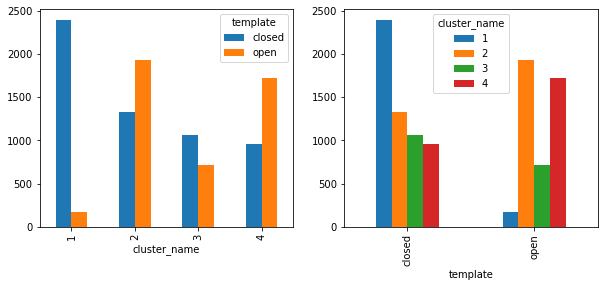

In [34]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
df1.plot(kind="bar", ax=ax[0])
df2.plot(kind="bar", ax=ax[1]) 

plt.show()
